In [1]:
import numpy as np 
import pandas as pd 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting train data
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# As Name of the passenger,Ticket and Fare are not needed to create model
# We will drop the three columns Name,Ticket and Fare from train data
train.drop(['Name','Ticket','Fare'],axis = 1,inplace=True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

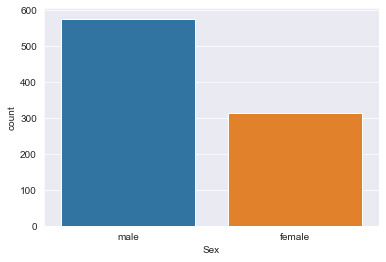

In [6]:
# Lets see how many male and female were there on the ship (train dataset)
print(train['Sex'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='Sex',data=train)

As we can see above in the graph, majority of passengers in the ship were male

<AxesSubplot:xlabel='Sex', ylabel='count'>

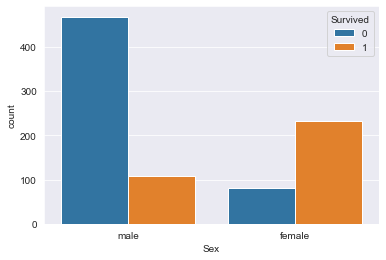

In [7]:
# Lets see if being a male or female had an impact on survival of the passenger
sns.countplot(x='Sex',data=train,hue='Survived')

**As given in the description, if value of Survived is 0 means passenger didn't survived and if the value is 1 it means passenger survived.
As shown in the above graph, majority of female survived as compared to male**

In [8]:
# Lets see what percentage of female and male survived
female_survivor = np.round((len(train[(train['Sex']=='female') & (train['Survived']==1)])/len(train[train['Sex']=='female']))*100,2)
male_survivor = np.round((len(train[(train['Sex']=='male') & (train['Survived']==1)])/len(train[train['Sex']=='male']))*100,2)

print(f'{female_survivor}% of female present on the ship survived')
print(f'{male_survivor}% of male present on the ship survived')

74.2% of female present on the ship survived
18.89% of male present on the ship survived


**Lets check how being in Upper,Middle or Lower class effected the passenger's survival**

3    491
1    216
2    184
Name: Pclass, dtype: int64


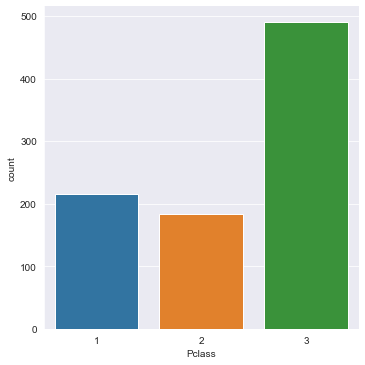

In [9]:
# Lets see the number of passengers from each class:
print(train['Pclass'].value_counts())

sns.catplot(x='Pclass',data=train,kind='count')

Maximum passenger on the ship belonged to Lower class

62.96% of passenger from Upper class survived
47.28% of passenger from Middle class survived
24.24% of passenger from Lower class survived


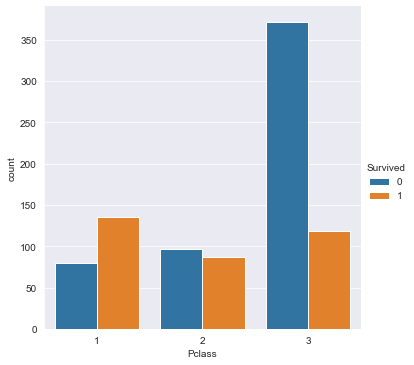

In [10]:
class_1_survived = np.round(len(train[(train['Pclass']==1) & (train['Survived']==1)])/len(train[train['Pclass']==1])*100,2)
class_2_survived = np.round(len(train[(train['Pclass']==2) & (train['Survived']==1)])/len(train[train['Pclass']==2])*100,2)
class_3_survived = np.round(len(train[(train['Pclass']==3) & (train['Survived']==1)])/len(train[train['Pclass']==3])*100,2)

print(f'{class_1_survived}% of passenger from Upper class survived')
print(f'{class_2_survived}% of passenger from Middle class survived')
print(f'{class_3_survived}% of passenger from Lower class survived')

sns.set_style('darkgrid')
sns.catplot(x='Pclass',data=train,hue='Survived',kind='count')

Clearly, most of the upper class passengers survived

* Lets explore the SibSp and Parch column which basically tells us whether passenger were alone or with there family.
* SibSp tells about Sibling and Spouse
* Parch tells about Parents and Child
* If any of the value is 1 then it means passenger was with his/her family

In [11]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [12]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
# We can combine both the columns to make a new column 'Family' which will tell us if the passenger was alone or with family

train['Family'] = train['SibSp']+train['Parch']

train['Family'].loc[train['Family']>0]='With Family'
train['Family'].loc[train['Family']==0] ='Alone'

C:\Users\Abhimanyu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Alone          537
With Family    354
Name: Family, dtype: int64


<AxesSubplot:xlabel='Family', ylabel='count'>

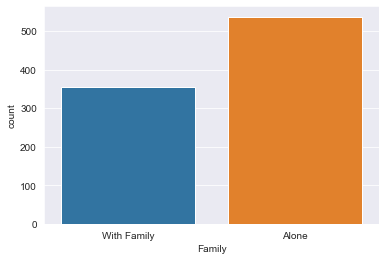

In [14]:
# Lets explore the Family column
print(train['Family'].value_counts())

sns.countplot(x='Family',data=train)

<AxesSubplot:xlabel='Family', ylabel='count'>

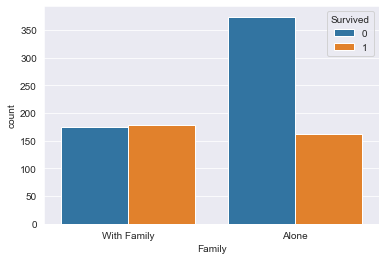

In [15]:
# Let see if being with family has any impact on survival of the passenger
sns.countplot(x='Family',data=train,hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Count'>

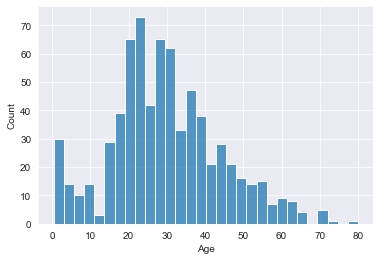

In [16]:
# Lets explore the Age column
sns.histplot(x='Age',data=train,bins=30)

Most of the passengers were between 20-40 years

In [17]:
# Lets check the number of null values in age column
train['Age'].isnull().sum()

177

In [18]:
# We can handle these missing values by replacing them with the avg age
avg_age = train['Age'].mean()

# function to find and replace the null value
def change(age):
    if np.isnan(age):
        return avg_age
    return age

# applying the change function to update 'Age' column
train['Age'] = train['Age'].apply(change)

In [19]:
# we can combine the Age and Sex column to create a new column 'Adult' which will tell if the passenger is adult(male or female) or child

# function to determine if passenger is male,female,child
def combine(passenger):
    sex,age = passenger
    if age<18:
        return 'child'
    return sex

# using the combine function to create 'Adult' column
train['Adult'] = train[['Sex','Age']].apply(combine,axis=1)        

male      519
female    259
child     113
Name: Adult, dtype: int64


<AxesSubplot:xlabel='Adult', ylabel='count'>

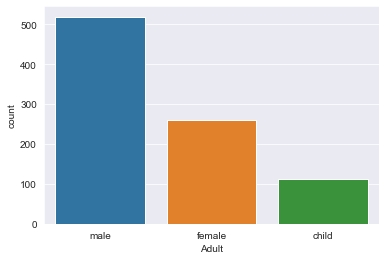

In [20]:
# Lets explore the new column
print(train['Adult'].value_counts())

sns.countplot(x='Adult',data=train)

<AxesSubplot:xlabel='Adult', ylabel='count'>

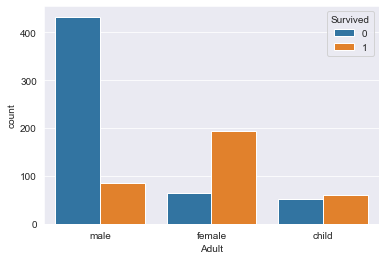

In [21]:
# Lets plot the Adult and Survived column
sns.countplot(x='Adult',data=train,hue='Survived')

 **As we saw in above graphs, majority of female passengers and Upper class passengers survived. We can say that Pclass and Sex are the most important feature.**

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Family,Adult
0,1,0,3,male,22.0,1,0,NaN,S,With Family,male
1,2,1,1,female,38.0,1,0,C85,C,With Family,female
2,3,1,3,female,26.0,0,0,NaN,S,Alone,female
3,4,1,1,female,35.0,1,0,C123,S,With Family,female
4,5,0,3,male,35.0,0,0,NaN,S,Alone,male


In [24]:
# Let's check the Cabin column
train['Cabin'][:5]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [25]:
# It seems there are null values present in the Cabin column.Let's check
train['Cabin'].isnull().sum()

687

In [28]:
# Let's create a copy of Cabin with no null values
cabin = train['Cabin'].dropna()

cabin.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [29]:
# Let's find out how many different cabins were present like A,B C etc.
diff_cabins= []

for item in cabin:
    diff_cabins.append(item[0])# item like C85 is a text and we can seperate C by doing item[0] where 0 is the index of C
    

# Let's create a dataframe for diff_cabins, which will help in visualization
cabins = pd.DataFrame(diff_cabins,columns=['cabin'])

# Let's sort them
cabins = cabins.sort_values(by='cabin')

<AxesSubplot:xlabel='cabin', ylabel='count'>

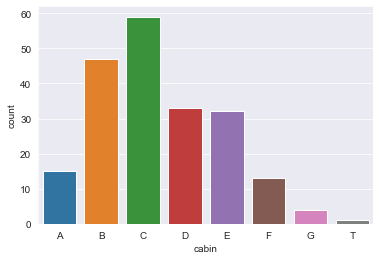

In [30]:
# Let's plot now
sns.countplot(x='cabin',data=cabins)

**There were total 8 cabins with most of the people staying in cabin C**

In [31]:
# Let's check the embarked column. Embarked means where people boarded the ship
# Let's first check the unique values in Embarked
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [32]:
# Let's drop the null values first
train.dropna(inplace=True)

In [33]:
# Let's check again
train['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

**C = Cherbourg, Q = Queenstown, S = Southampton**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

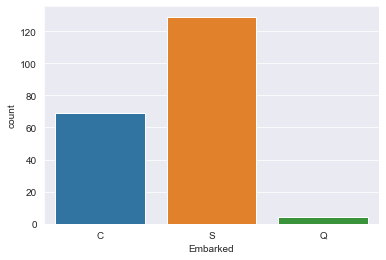

In [34]:
# Let's see how many people boarded from all three locations
sns.countplot(x='Embarked',data=train)

**Most of the passengers boarded from Southampton**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

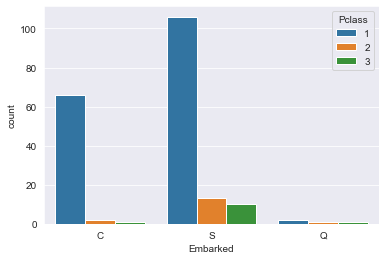

In [35]:
# Let's see if we can findout any relation between class of the passengers and there boarding location
sns.countplot(x='Embarked',data=train,hue='Pclass')

**Most of the uper class passengers boarded from Cherbourg and Southampton**

# THANK YOU